## Exercise 1&2

As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wrangle import wrangle_zillow
from scipy import stats

In [2]:
#Read in the dataset
df = wrangle_zillow()
df.head()

,bedrooms,bathrooms,sq_ft,home_value,year_built,tax_amount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [3]:
df.drop(columns=['tax_amount'], inplace=True)

In [4]:
#Split the data before performing scaling on the train portion
seed = 42

train, valid_test = train_test_split(df, test_size=0.3,
                                     random_state=seed)

valid, test = train_test_split(valid_test, test_size=0.5,
                               random_state=seed)

In [5]:
#Check the shape of train
train.shape

(1498164, 6)

In [6]:
train = train[train['sq_ft'] < 100000]

In [7]:
train = train[train['home_value'] < 2000000]

In [8]:
train = train[train['bathrooms'] < 10]

In [9]:
train = train[train['bedrooms'] < 10]

In [10]:
train.shape

(1470723, 6)

## Exercise 3

Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [11]:
#Define the visualization function
def plot_variable_pairs(df):
    sns.pairplot(data=df.sample(1000), kind='reg', diag_kind='kde')

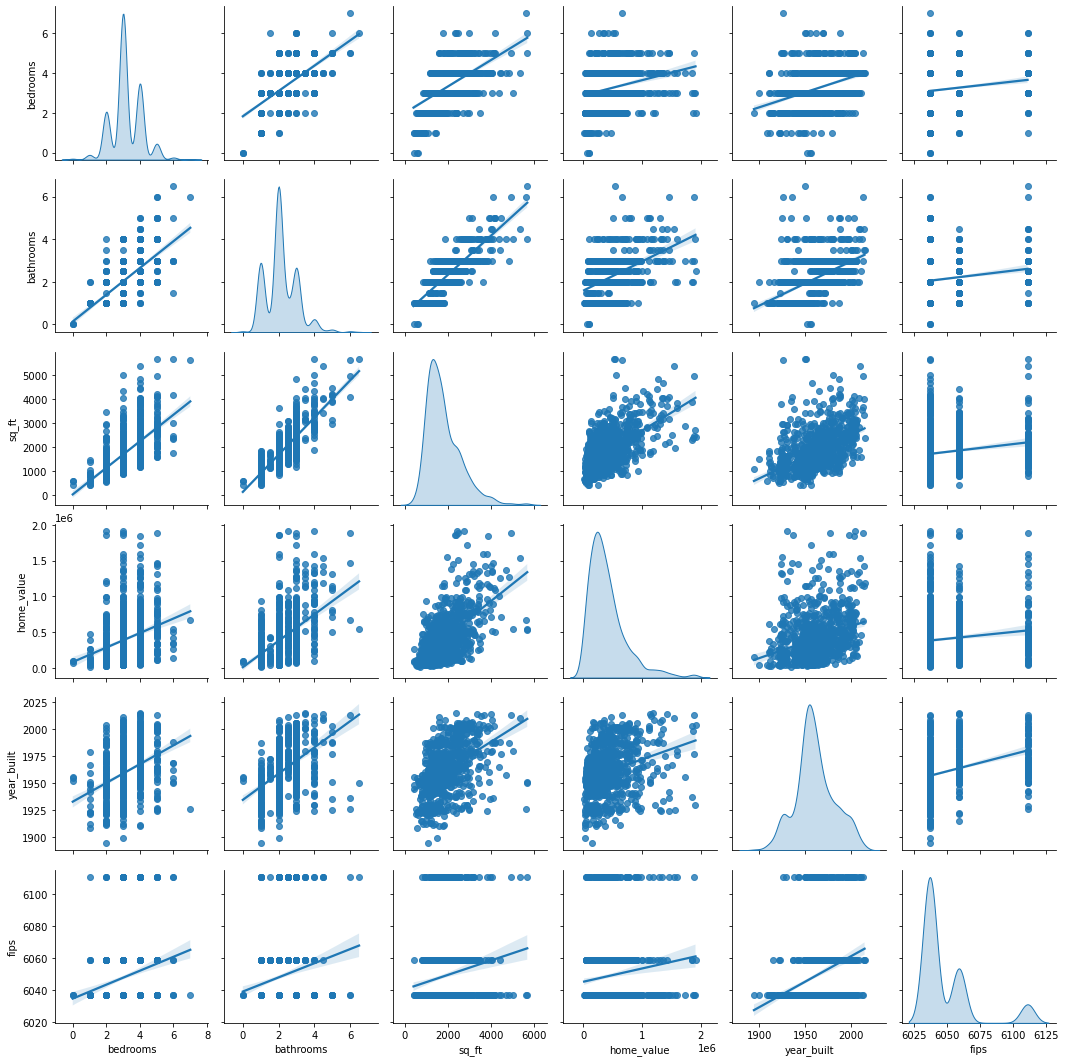

In [12]:
plot_variable_pairs(train)

## Exercise 4

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [13]:
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    df_sample = df.sample(1000)
    plt.figure()
    sns.stripplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.boxplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.barplot(x=categorical, y=continuous, data=df_sample)

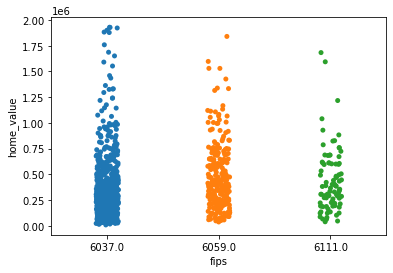

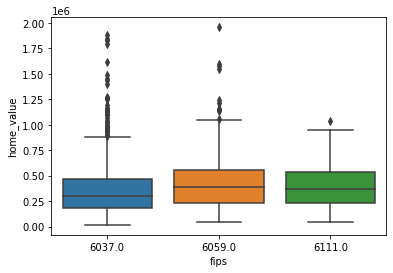

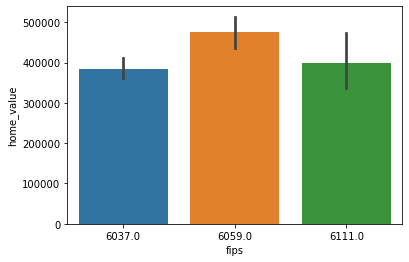

In [14]:
plot_categorical_and_continuous_vars(train, 'fips', 'home_value')

## Exercise 5

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

## Exercise 6

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

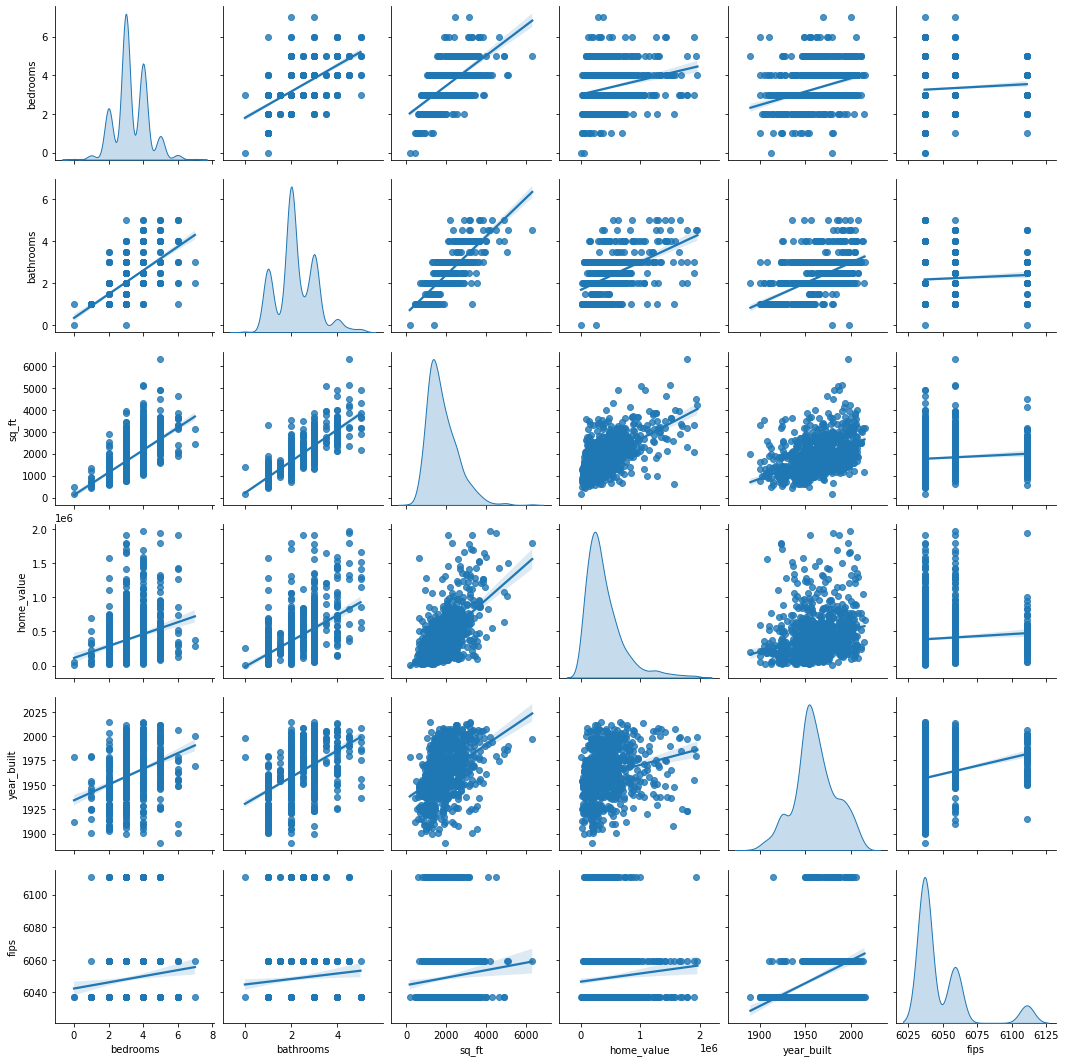

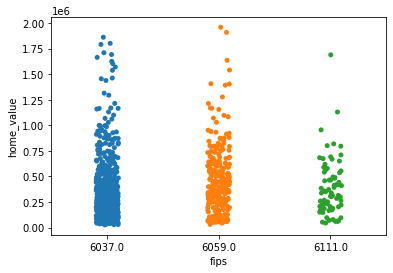

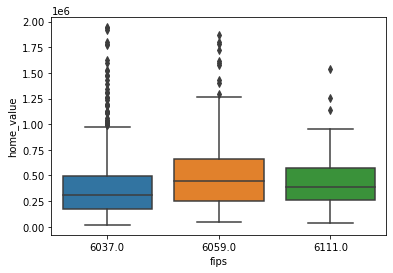

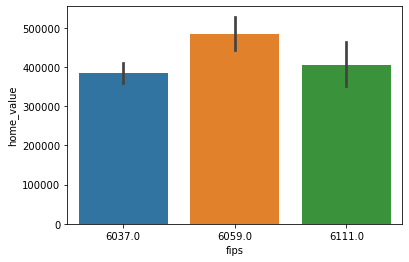

In [15]:
from explore import plot_variable_pairs, plot_categorical_and_continuous_vars

plot_variable_pairs(train)

plot_categorical_and_continuous_vars(train, 'fips', 'home_value')

## Exercise 7

Come up with some initial hypotheses based on your goal of predicting property value.

### Initial hypotheses

Bedroom count is correlated with home value.  
Bathroom count is correlated with home value.  
Square footage is correlated with home value.  
Location is correlated with home value.

## Exercise 8

Visualize all combinations of variables in some way.

In [16]:
train_corr = train.corr()
train_corr

,bedrooms,bathrooms,sq_ft,home_value,year_built,fips
bedrooms,1.000000,0.632899,0.615260,0.282948,0.377065,0.146575
bathrooms,0.632899,1.000000,0.818020,0.518655,0.524876,0.119362
sq_ft,0.615260,0.818020,1.000000,0.590247,0.467314,0.126530
home_value,0.282948,0.518655,0.590247,1.000000,0.277583,0.077739
year_built,0.377065,0.524876,0.467314,0.277583,1.000000,0.305995
fips,0.146575,0.119362,0.126530,0.077739,0.305995,1.000000


<AxesSubplot:>

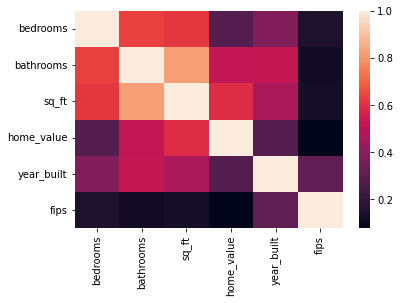

In [17]:
sns.heatmap(train_corr)

## Exercise 9

Run the appropriate statistical tests where needed.

In [18]:
alpha = 0.05

r_bed, p_bed = stats.pearsonr(x=train['bedrooms'], y=train['home_value'])

r_bath, p_bath = stats.pearsonr(x=train['bathrooms'], y=train['home_value'])

## Exercise 10

What independent variables are correlated with the dependent variable, home value?

In [19]:
if p_bed < alpha:
    print('The number of bedrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bed))
else:
    print('The number of bedrooms is NOT correlated with home value.')

print()    
    
if p_bath < alpha:
    print('The number of bathrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bath))
else:
    print('The number of bathrooms is NOT correlated with home value.')

The number of bedrooms is correlated with home value.
The correlation coefficient is 0.2829477626012842.

The number of bathrooms is correlated with home value.
The correlation coefficient is 0.5186548205814135.


## Exercise 11

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [20]:
r_ind, p_ind = stats.pearsonr(x=train['sq_ft'], y=train['bathrooms'])

In [21]:
if p_ind < alpha:
    print('The number of bathrooms is correlated with the square footage.')
    print('The correlation coefficient is {}.'.format(r_ind))
else:
    print('The number of bathrooms is NOT correlated with the square footage.')

The number of bathrooms is correlated with the square footage.
The correlation coefficient is 0.8180196811131167.


## Exercise 12

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## Exercise 13

Explore your dataset with any other visualizations you think will be helpful.